# **Árboles de clasificación**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [43]:
df = pd.read_csv('Movie_classification.csv')
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

De la tabla anterior, se puede apreciar que la variable **"Time_takes"** contiene datos faltantes, y hay variables categóricas, **"3D_available"**, y **"Genre"**.

# **Tratamiento de datos faltantes**

In [45]:
mean = df['Time_taken'].mean()
mean

157.39149797570855

In [46]:
# Imputación de datos faltantes con la media
df['Time_taken'] = df['Time_taken'].fillna(mean)

In [47]:
# verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Debido a que no existen datos faltantes, procedemos a transformar variables categóricas a numéricas.

# **Variables categóricas**

In [48]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [49]:
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [60]:
freq_class = df.groupby('Start_Tech_Oscar')['Start_Tech_Oscar'].count()
freq_class

Start_Tech_Oscar
0    230
1    276
Name: Start_Tech_Oscar, dtype: int64

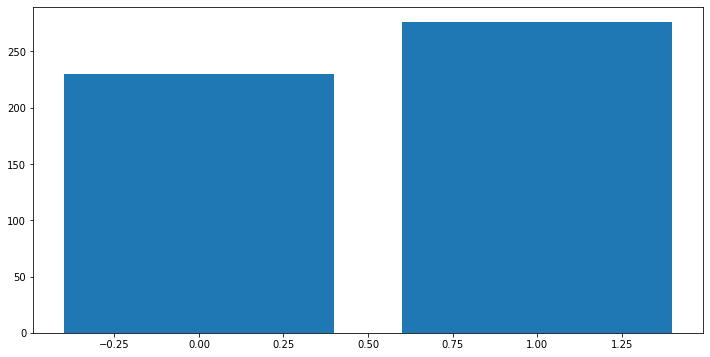

In [67]:
plt.figure(figsize=(12,6))
plt.bar(freq_class.index, freq_class)
plt.show()

# **Separación X, y**

In [50]:
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

# **División train_test**

In [51]:
# separación en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Árbol de clasificación**

Parámetros:

- **criterion** : Función para medir la calidad de una división. Los criterios soportados son *"gini"* para la impureza de Gini y *"log_loss"* y *"entropy"* ambos para la ganancia de información de Shannon.

- **splitter** : La estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son *"best"* para elegir la mejor división y *"aleatoria"* para elegir la mejor división aleatoria.

- **max_depth** : Profundidad máxima del árbol. Si es *None*, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos que *min_samples_split*.

- **min_samples_leaf** : Número mínimo de muestras requerido para estar en un nodo hoja. Un punto de división en cualquier profundidad sólo se considerará si deja al menos *min_samples_leaf* muestras de entrenamiento en cada una de las ramas izquierda y derecha.

**Referencia:** [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
classtree = DecisionTreeClassifier(max_depth=6, min_samples_split=3, min_samples_leaf=3, splitter='best')
classtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3)

# **Predicción**

In [ ]:
y_pred_train = classtree.predict(X_train)
y_pred_test = classtree.predict(X_test)

# **Rendimiento (Performance)**

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [69]:
# metrics for train
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1score = f1_score(y_train, y_pred_train)
confusionm = confusion_matrix(y_train, y_pred_train)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.7542372881355932
Precision: 0.7865168539325843
Recall: 0.7407407407407407
F1score: 0.7629427792915531


In [70]:
confusionm

array([[127,  38],
       [ 49, 140]])

In [71]:
# metrics for test
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1score = f1_score(y_test, y_pred_test)
confusionm = confusion_matrix(y_test, y_pred_test)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.506578947368421
Precision: 0.5833333333333334
Recall: 0.4827586206896552
F1score: 0.5283018867924529


In [72]:
confusionm

array([[35, 30],
       [45, 42]])

# **Gráfico del ábol de decisión**

In [ ]:
from IPython.display import Image
!pip install pydotplus 
import pydotplus
from sklearn.tree import export_graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


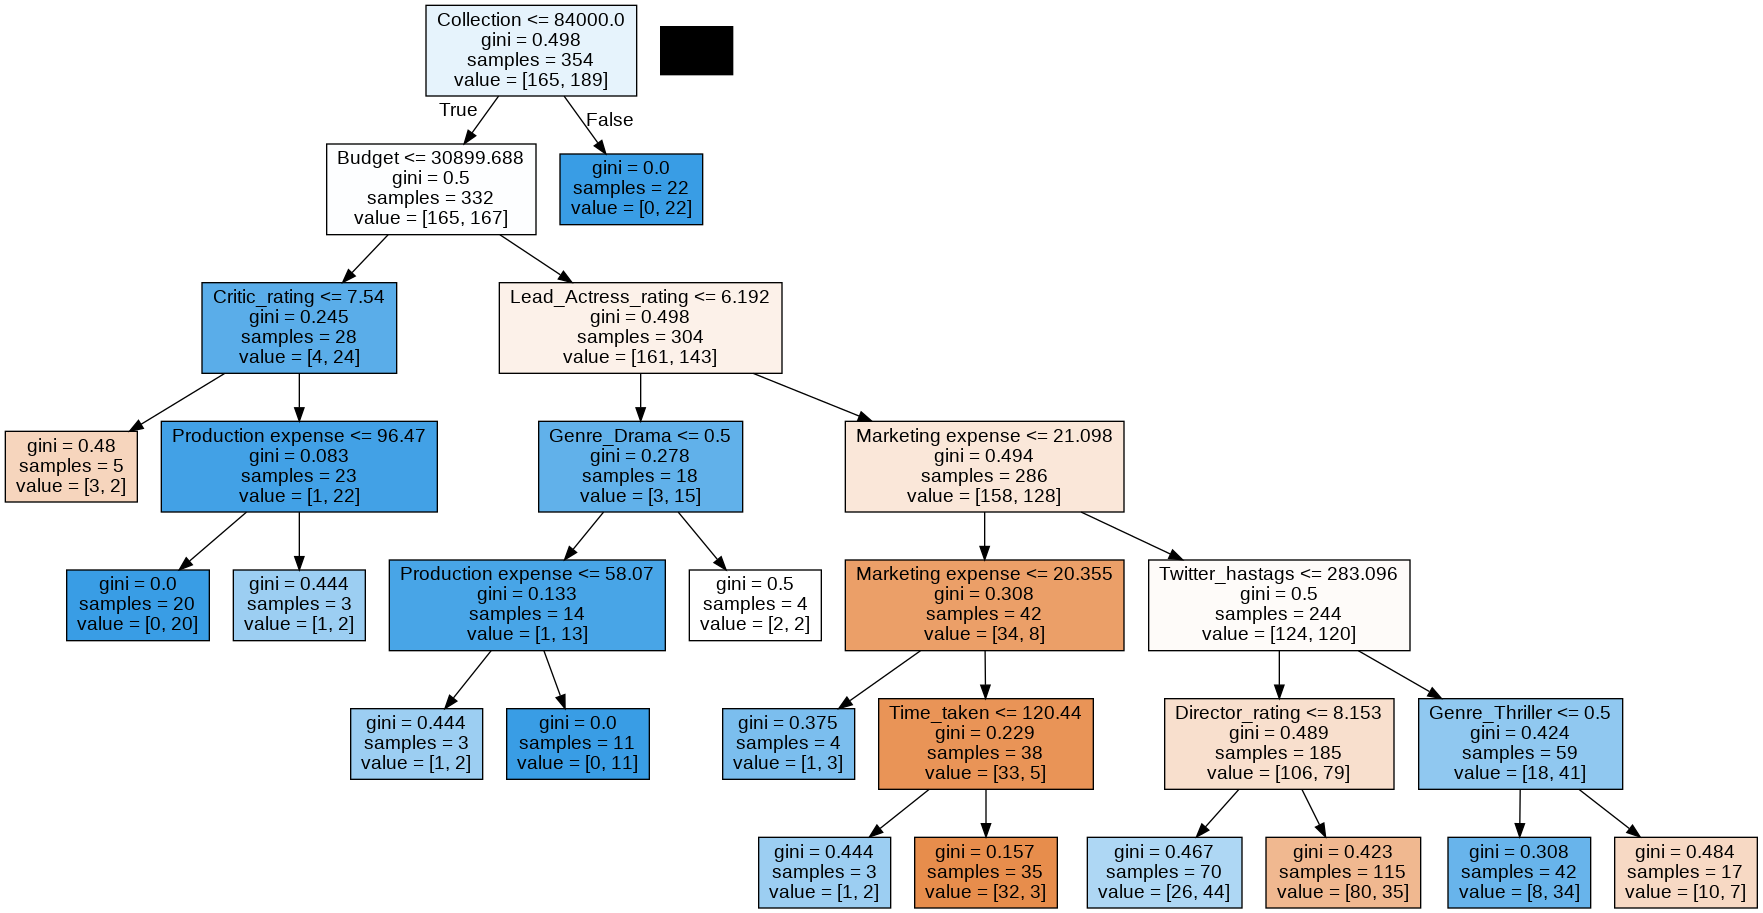

In [ ]:
dot_data = export_graphviz(classtree, feature_names= X_train.columns,out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())